## To implement the Role of Data Normalization in Kernel Methods for Image Classification on your dataset of cancer cell images, you can follow these steps. Your task involves classifying malignant and benign skin lesions using a kernel-based classifier, like an SVM (Support Vector Machine) with an RBF kernel.

Here’s how you can implement it:

Steps for Implementation
Load and Preprocess the Dataset:

Load the images of both malignant and benign lesions.
Convert the images into numerical arrays (pixel values).
Split the dataset into training and testing sets.
Normalize the Image Data:

Apply normalization (e.g., Min-Max Scaling or Z-score Normalization) to standardize the pixel values.
Train the Kernel-Based Classifier (SVM with RBF Kernel):

Use an SVM with an RBF kernel to train on the normalized dataset.
Evaluate the Model:

Use accuracy, confusion matrix, or ROC curve to evaluate the model's performance.
Here is the Python code to implement this:

## *Step 1: Load and Preprocess the Image Dataset*
Since you’re working with skin lesion images, let's assume the images are stored in folders (/malignant and /benign). You can use the PIL library to load images and scikit-learn to split the data.

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define directories
malignant_dir = 'dataset/benign'
benign_dir = 'dataset/malignant'

# Function to load images and their labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).resize((128, 128))  # Resize to 128x128
        img_array = np.array(img)
        if img_array is not None:
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load malignant and benign images
malignant_images, malignant_labels = load_images_from_folder(malignant_dir, 1)  # 1 for malignant
benign_images, benign_labels = load_images_from_folder(benign_dir, 0)  # 0 for benign

# Combine and split the data
X = np.array(malignant_images + benign_images)
y = np.array(malignant_labels + benign_labels)

# Flatten images (SVM requires vector input)
X = X.reshape(X.shape[0], -1)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## *Step 2: Normalize the Image Data*
You can apply Z-score normalization or Min-Max Scaling to normalize the pixel values. Here’s how to apply Z-score normalization using StandardScaler from scikit-learn.

In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize pixel values using Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_normalized = scaler.fit_transform(X_train.astype(np.float32))
X_test_normalized = scaler.transform(X_test.astype(np.float32))


In [3]:
print(f"Mean of training data (before normalization): {np.mean(X_train)}, after normalization: {np.mean(X_train_normalized)}")
print(f"Std of training data (before normalization): {np.std(X_train)}, after normalization: {np.std(X_train_normalized)}")

Mean of training data (before normalization): 155.87145873646676, after normalization: 7.427584769459372e-09
Std of training data (before normalization): 48.53657648940914, after normalization: 1.0000004768371582


## *Step 3: Train the Kernel-Based Classifier (SVM with RBF Kernel)*
Next, train the SVM classifier with an RBF kernel on the normalized dataset.

In [5]:
from sklearn.svm import SVC

# Create and train an SVM with RBF kernel
svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0)

# Train the model
svm_classifier.fit(X_train_normalized, y_train)


SVC()

## *Step 4: Evaluate the Model*
After training, evaluate the classifier on the test dataset.

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_normalized)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Accuracy: 94.44%
Confusion Matrix:
[[47  0]
 [ 3  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.57      0.73         7

    accuracy                           0.94        54
   macro avg       0.97      0.79      0.85        54
weighted avg       0.95      0.94      0.94        54



## ROC Curve (For Binary Classification)
You may want to plot the ROC curve to better understand how well the model performs, especially for imbalanced datasets.

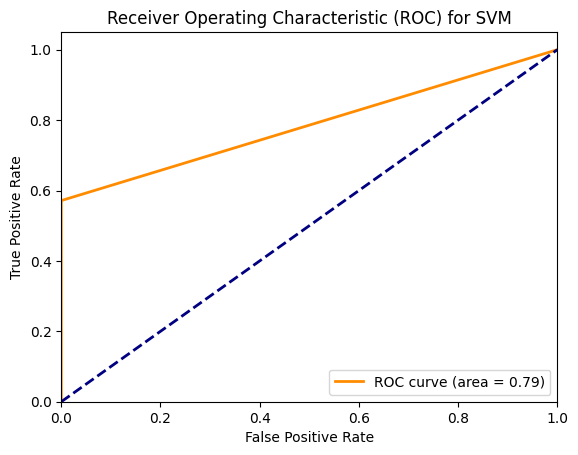

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for SVM classifier
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SVM')
plt.legend(loc="lower right")
plt.show()


### Summary
* Loading Data: Skin lesion images are loaded and converted into numerical arrays.
* Data Normalization: Z-score normalization is applied to standardize pixel intensities.
* Kernel SVM: An SVM classifier with an RBF kernel is trained on the normalized data.
* Model Evaluation: Accuracy, confusion matrix, and ROC curve help in evaluating model performance.
